In [1]:
#What we have just discussed is called "Otsu's Method for Thresholding"
# importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = cv2.imread('E:\P-Project & Lab\OpenCV\IR.jpg')
print('Image matrix shape {}'.format(image.shape))

Image matrix shape (162, 267, 3)


In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Image matrix shape {}'.format(image_g.shape))

Image matrix shape (162, 267)


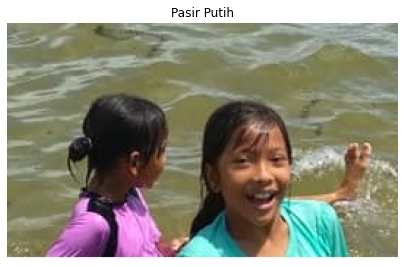

In [4]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.imshow(image)
plt.axis('off')
plt.title('Pasir Putih')
plt.show()

In [6]:
def otsu_thresholding(image_g):
    
    img_hist = cv2.calcHist([image_g], [0], None, [256], [0,256])
    sigmas = []
    n = sum(img_hist)
    for i in range(1, 255):
        _, s1 = class_variance(img_hist, 0, i)
        _, s2 = class_variance(img_hist, i, 256)
        sigma = sum(img_hist[0:i])*s1/n + sum(img_hist[i:256])*s2/n
        sigmas.append(sigma[0])

    image_th = simple_thresholding1(image_g, np.argmin(sigmas))
    image_th = 255 - image_th
    f, ax = plt.subplots(1, 1, figsize = (7, 7))
    ax.axis('off')
    plt.imshow(image_th, cmap = 'gray')
    plt.show()
    
    print('Otsu\'s Threshold {}'.format(np.argmin(sigmas)))
    
    return image_th

image_th = otsu_thresholding(image_g)

NameError: name 'class_variance' is not defined

In [ ]:
#Clustering - Segmenting by a distance criteria

In [7]:
import pandas as pd
from sklearn.cluster import KMeans

In [8]:
def cluster_image(img, k = 3):
    
    image_data = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
    imdf = pd.DataFrame(data = image_data, columns = ['r', 'g', 'b'])
    
    kmeans = KMeans(k)
    kmeans.fit(imdf)
    
    imdf.loc[:, 'cluster'] = kmeans.labels_   
    
    clustermeans = pd.DataFrame(data = kmeans.cluster_centers_, columns = ['rc', 'gc', 'bc'])
    clustermeans.loc[:, 'cluster'] = clustermeans.index
    
    mergedf = imdf.merge(clustermeans, on = 'cluster', how = 'left')
    
    image_cl = mergedf[['rc', 'gc', 'bc']].values.reshape(image.shape[0], image.shape[1], image.shape[2])
    
    print('Cluster centers = \n {}'.format(clustermeans))
    
    return image_cl


SyntaxError: unexpected EOF while parsing (<ipython-input-8-c81ef739b88c>, line 21)

In [9]:
image_2 = cluster_image(image, k = 2)
image_3 = cluster_image(image, k = 3)
image_4 = cluster_image(image, k = 4)
image_5 = cluster_image(image, k = 5)
image_6 = cluster_image(image, k = 6)

NameError: name 'cluster_image' is not defined

NameError: name 'image_2' is not defined

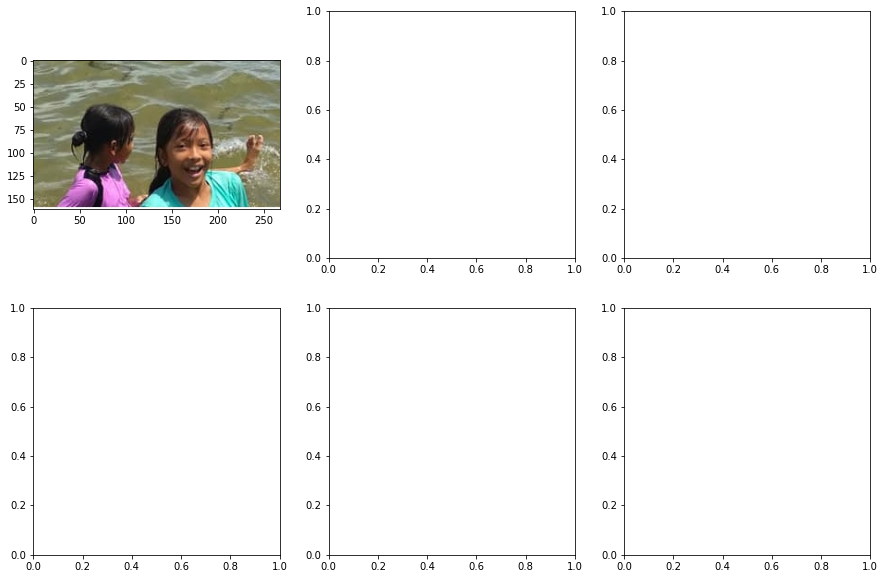

In [10]:
f, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0][0].imshow(image)
ax[0][1].imshow(image_2/255)
ax[0][2].imshow(image_3/255)
ax[1][0].imshow(image_4/255)
ax[1][1].imshow(image_5/255)
ax[1][2].imshow(image_6/255)

for x in ax:
    for y in x:
        y.axis('off')
    
plt.show()

In [11]:
final = np.where((image_6[:, :, 2] > 150) & (image_6[:, :, 1] < 100) & (image_6[:, :, 0] < 100), 255,
                 np.where((image_6[:, :, 2] < 100) & (image_6[:, :, 1] > 100) & (image_6[:, :, 0] < 100), 125, 0))
f, ax = plt.subplots(1, 1, figsize = (10, 10))
plt.imshow(final, cmap = 'gray')
ax.axis('off')
plt.show()

NameError: name 'image_6' is not defined

In [12]:
#morphological techniques
image_6_ = np.where((image_6[:, :, 2] > 150) & (image_6[:, :, 1] < 100) & (image_6[:, :, 0] < 100), 0,
                    np.where((image_6[:, :, 2] < 100) & (image_6[:, :, 1] > 100) & (image_6[:, :, 0] < 100), 125, 255)).astype(np.uint8)
plt.imshow(image_6_, cmap = 'gray')
plt.show()

NameError: name 'image_6' is not defined

In [13]:
image_th = otsu_thresholding(image_6_)

NameError: name 'image_6_' is not defined

In [14]:
cv2.imwrite('..//assets//traditional_segmentation//{}_otsu_thresh.jpg'.format(name), image_th)

NameError: name 'name' is not defined